In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
print(tf.__version__)
from sklearn.model_selection import KFold

2.9.1


## data loading

In [2]:
data_path = "TCIR-ALL_2017.h5"
data_info = pd.read_hdf(data_path, key="info", mode='r')
with h5py.File(data_path, 'r') as hf:
    data_matrix = hf['matrix'][:]

In [3]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


In [4]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data_set   4580 non-null   object 
 1   ID         4580 non-null   object 
 2   lon        4580 non-null   float64
 3   lat        4580 non-null   float64
 4   time       4580 non-null   object 
 5   Vmax       4580 non-null   float64
 6   R35_4qAVG  4580 non-null   float64
 7   MSLP       4580 non-null   float64
dtypes: float64(5), object(3)
memory usage: 322.0+ KB


In [5]:
np.shape(data_matrix
)

(4580, 201, 201, 4)

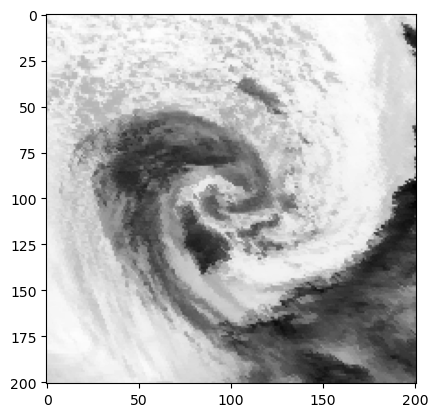

In [6]:
img = data_matrix[4,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img, plt.cm.gray)

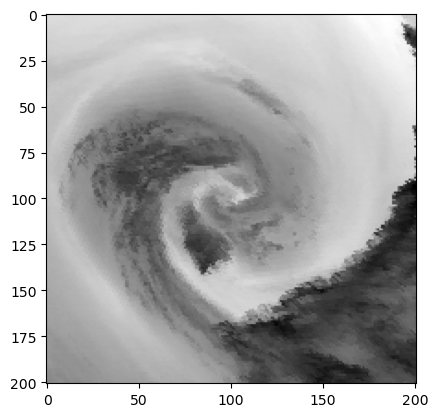

In [7]:
img = data_matrix[4,:,:,1].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img, plt.cm.gray)

In [8]:
data_path_1 = "TCIR-ALL_2017.h5"
data_info_1 = pd.read_hdf(data_path_1, key="info", mode='r')
data_info_1

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0
...,...,...,...,...,...,...,...,...
4575,WPAC,201733W,105.0,8.4,2017122600,20.0,0.0,1007.0
4576,WPAC,201733W,104.7,8.4,2017122603,20.0,0.0,1007.0
4577,WPAC,201733W,104.4,8.4,2017122606,20.0,0.0,1007.0
4578,WPAC,201733W,104.0,8.4,2017122609,18.0,0.0,1009.0


In [11]:
# data_info_1.drop_duplicates(subset =["ID"])

In [13]:
# data_info_1

In [9]:
data_path_2 = "TCIR-ALL_2017.h5"
data_info_2 = pd.read_hdf(data_path_2, key="info", mode='r')
data_info_2.head()
print(len(data_info), len(data_info_1), len(data_info_2))

4580 4580 4580


Is there missing value?

In [10]:
data_info.isna().sum(axis=0)
data_info_1.isna().sum(axis=0)
data_info_2.isna().sum(axis=0)

data_set     0
ID           0
lon          0
lat          0
time         0
Vmax         0
R35_4qAVG    0
MSLP         0
dtype: int64

In [11]:
data_info.data_set.unique()
data_info_1.data_set.unique()
data_info_2.data_set.unique()

array(['ATLN', 'EPAC', 'IO', 'SH', 'WPAC'], dtype=object)

In [12]:
data_info.groupby('ID').count()
data_info_1.groupby('ID').count().head()
data_info_2.groupby('ID').count().head()

,data_set,lon,lat,time,Vmax,R35_4qAVG,MSLP
ID,,,,,,,
201701E,21,21,21,21,21,21,21
201701I,23,23,23,23,23,23,23
201701L,53,53,53,53,53,53,53
201701S,47,47,47,47,47,47,47
201701W,67,67,67,67,67,67,67


In [13]:
data_info_1.iloc[-1]
data_info_2.iloc[-1]

data_set           WPAC
ID              201733W
lon               103.6
lat                 8.5
time         2017122612
Vmax               15.0
R35_4qAVG           0.0
MSLP             1010.0
Name: 4579, dtype: object

In [14]:
data_info = data_info.assign(time=pd.to_datetime(data_info.time, format=r'%Y%m%d%H'))

Is it true that for every ID the increase in time is 3 hours?

In [15]:
data_info[['ID', 'time']].groupby('ID').diff().nunique()

time    1
dtype: int64

In [16]:
data_info_1 = data_info.assign(time=pd.to_datetime(data_info_1.time, format=r'%Y%m%d%H'))
data_info_2 = data_info.assign(time=pd.to_datetime(data_info_2.time, format=r'%Y%m%d%H'))

In [17]:
data_info_1[['ID', 'time']].groupby('ID').diff().nunique()
data_info_2[['ID', 'time']].groupby('ID').diff().nunique()

time    1
dtype: int64

## Data preprocessing

In [28]:
## keep only IR and PMW
X_irpmw = data_matrix[:,:,:,0::3]
y = data_info['Vmax'].values[:,np.newaxis]

In [29]:
print(type(y))

<class 'numpy.ndarray'>


In [30]:
X_irpmw[np.isnan(X_irpmw)] = 0
X_irpmw[X_irpmw > 1000] = 0

In [31]:
train_x, test_x, train_y, test_y = train_test_split(X_irpmw, y, random_state = 101, test_size=0.2)

In [26]:


# X_tensor = tf.convert_to_tensor(X_irpmw) 
# y = tf.convert_to_tensor(y)


# X_std = tf.image.per_image_standardization(X_tensor)

In [32]:
 kf = KFold(n_splits=2)
 for train_index, test_index in kf.split(X_irpmw):
     print("TEST:", len(list(train_index)), type(list(test_index)))
     X_train, X_test = X_irpmw[train_index], X_irpmw[test_index]
     y_train, y_test = y[train_index], y[test_index]

TEST: 2290 <class 'list'>
TEST: 2290 <class 'list'>


In [33]:
X_tensor = tf.convert_to_tensor(X_irpmw)
y = tf.convert_to_tensor(y)

In [34]:
print(type(y))

<class 'tensorflow.python.framework.ops.EagerTensor'>


### Standardization

In [35]:
tf.config.list_physical_devices('GPU')

[]

In [36]:
X_std = tf.image.per_image_standardization(X_tensor)

In [37]:
img = X_std[0,:,:,:]
print(np.mean(img), np.std(img))

-3.965676e-08 1.0


## Preprocessing layers

In [38]:
class Preprocessing(keras.layers.Layer):
    def __init__(self):
        super(Preprocessing, self).__init__()
    def call(self, inputs, training=None):
        if training:
            inputs = tf.image.rot90(inputs, k=np.random.randint(4))
        return tf.image.central_crop(inputs, 0.5)

In [39]:
pp = Preprocessing()

In [40]:
rotated = pp(X_std[:5,:,:,:], training=True)

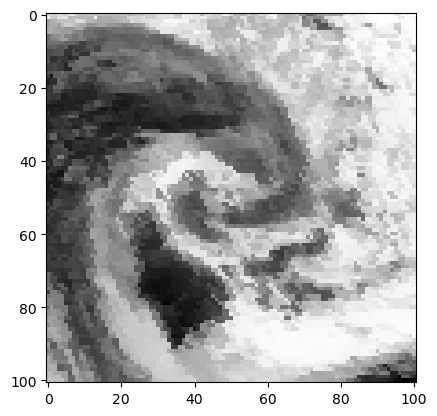

In [41]:
fig, ax = plt.subplots()
pos = ax.imshow(rotated[4,:,:,0], plt.cm.gray)

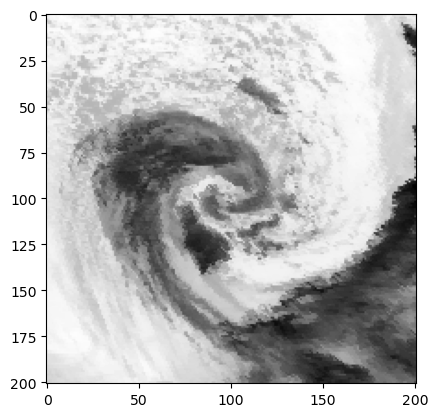

In [42]:
fig, ax = plt.subplots()
pos = ax.imshow(X_std[4,:,:,0], plt.cm.gray)

## Building a model

In [43]:
X_std[list(np.array([0,1,2]))]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.1870103, -1.0012519], dtype=float32)>

In [44]:
# input_size = len(X_std)
# output_size = 10

"""
references: 
layers API: https://keras.io/api/layers/ 

1. some parameter tuning: 
    batch size: BATCH_SIZE = 128 #@param ["64", "128", "256", "512"]
    regularizer: l1,l2 
    how to set the initial weight: weights_initializer = keras.initializers.GlorotUniform()  
    batch size: 32 
    how to choose metric?  https://www.tensorflow.org/guide/keras/train_and_evaluate  
        right now, I am using mse. 
    what is callback?  https://keras.io/api/callbacks/  
3. 3 fold cross-validation 
4. hold out data for testing 
5. all years data 
"""



#A function that trains and validates the model and returns the MSE
def train_val_model(train_x,train_y,val_x,val_y, n_epochs, batch_size):
    reg_param = 1e-5
    
    train_X = tf.convert_to_tensor(train_x)
    train_Y = tf.convert_to_tensor(train_y)
    train_X = tf.image.per_image_standardization(train_X)
    
    val_X = tf.convert_to_tensor(val_x)
    val_Y = tf.convert_to_tensor(val_y)
    val_X = tf.image.per_image_standardization(val_X)
    
    weights_initializer = keras.initializers.GlorotUniform()
    

    model = keras.models.Sequential([
        Preprocessing(),
        keras.layers.Conv2D(filters=16, kernel_size=4, strides=2, padding='valid', activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Dense(128, activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
        keras.layers.Dense(1, activation='relu', kernel_initializer = weights_initializer, kernel_regularizer=keras.regularizers.l2(reg_param)),
    ])
    
    #Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(lr=5e-4, beta_1=0.99, beta_2=0.9999),
                  loss='mean_squared_error', #Computes the mean of squares of errors between labels and predictions
                  metrics=['mean_squared_error'], #Computes the mean squared error between y_true and y_pred
                 )
    # initialize TimeStopping callback 
#     time_stopping_callback = tfa.callbacks.TimeStopping(seconds=5*60, verbose=1)
    
    #Training the network
    history = model.fit(train_X,train_Y, 
         epochs=n_epochs,
         batch_size=batch_size, 
         verbose=1,
         validation_split=0.1,
         #callbacks=[tf.keras.callbacks.TensorBoard(run_dir + "/Keras"), time_stopping_callback]
        )
    
    val_score = model.evaluate(val_X, val_Y)
    print("Val Score: ",val_score)
    return history,val_score

In [45]:
n_epochs=20
vector = np.vectorize(np.int_)
batch_size=64
model_history = []  #save the model history in a list after fitting so that we can plot later
val_scores=[]
kf = KFold(n_splits=5)
d = vector(y)
i=0
for train_index, test_index in kf.split(X_irpmw):
    print("Training on Fold: ",i+1)
    i+=1
    train_x, val_x = X_irpmw[train_index], X_irpmw[test_index]
    train_y, val_y = d[train_index], d[test_index]
    history,val_score = train_val_model(train_x,train_y,val_x,val_y, n_epochs, batch_size)
    model_history.append(history)
    val_scores.append(val_score)
    print("======="*12, end="\n\n\n")

Training on Fold:  1


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
52/52 [==============================] - 10s 100ms/step - loss: 1140.0558 - mean_squared_error: 1140.0481 - val_loss: 878.7942 - val_mean_squared_error: 878.7869
Epoch 2/20
52/52 [==============================] - 5s 94ms/step - loss: 694.9705 - mean_squared_error: 694.9637 - val_loss: 485.3642 - val_mean_squared_error: 485.3577
Epoch 3/20
52/52 [==============================] - 5s 93ms/step - loss: 607.6107 - mean_squared_error: 607.6046 - val_loss: 417.8904 - val_mean_squared_error: 417.8844
Epoch 4/20
52/52 [==============================] - 5s 93ms/step - loss: 551.8633 - mean_squared_error: 551.8574 - val_loss: 258.6870 - val_mean_squared_error: 258.6812
Epoch 5/20
52/52 [==============================] - 5s 91ms/step - loss: 504.1580 - mean_squared_error: 504.1523 - val_loss: 190.2919 - val_mean_squared_error: 190.2860
Epoch 6/20
52/52 [==============================] - 5s 87ms/step - loss: 472.9619 - mean_squared_error: 472.9560 - val_loss: 362.8289 - val_mean_square

In [46]:
def plot_xy(history,title):
    fig = plt.figure()
    x=range(n_epochs)
    train_mse=history.history['loss']
    val_mse=history.history['val_loss']
    plt.plot(x,train_mse,label="train_mse")
    plt.plot(x,val_mse,label="val_mse")
    plt.xlabel('epochs')
    plt.ylabel('mse (kt^2)')
    plt.title(title)
    plt.legend()

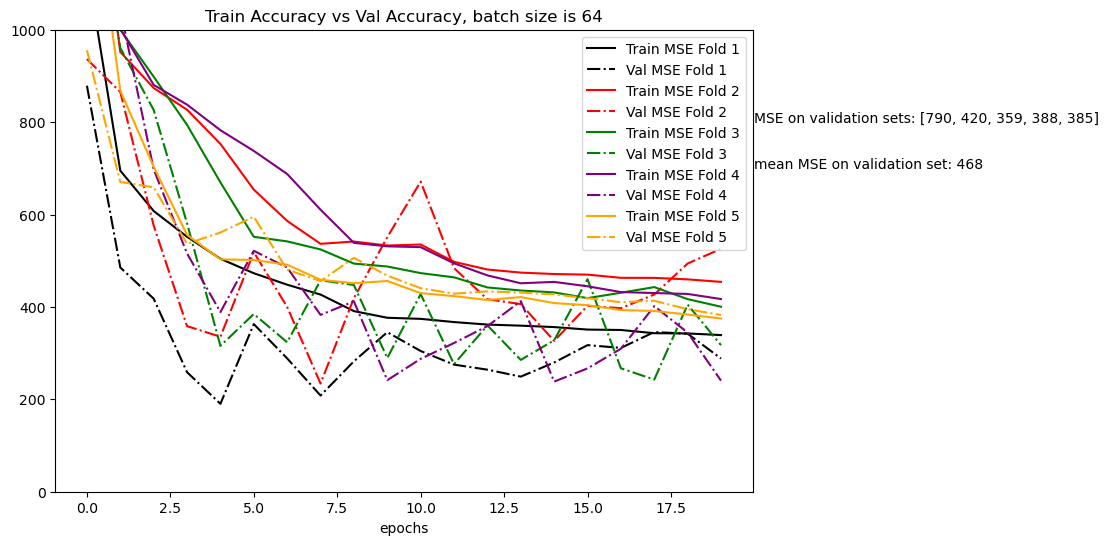

In [47]:
plt.figure(figsize=(9,6))
plt.title('Train Accuracy vs Val Accuracy, batch size is 64')
colors=['black','red','green','purple','orange']
for i in range(5):
    plt.plot(model_history[i].history['mean_squared_error'], label='Train MSE Fold '+str(i+1), color=colors[i])
    plt.plot(model_history[i].history['val_mean_squared_error'], label='Val MSE Fold '+str(i+1), color=colors[i], linestyle = "dashdot")

plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylim(0,1000)
plt.text(20,800,"MSE on validation sets: "+str([int(v) for v,v2 in val_scores]))
plt.text(20,700,"mean MSE on validation set: "+str(int(np.mean(val_scores,axis=0)[0])))
plt.show()

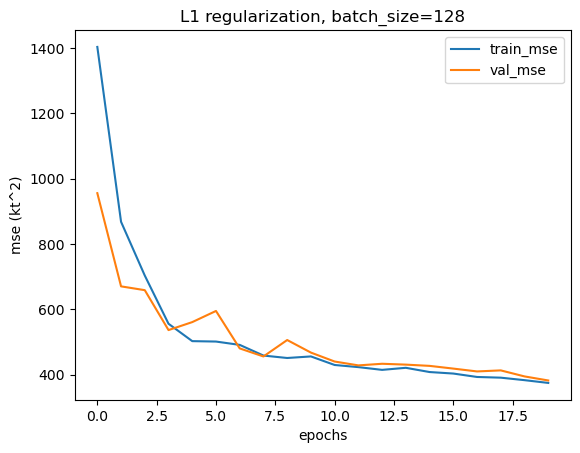

In [48]:
plot_xy(history,"L1 regularization, batch_size=128")

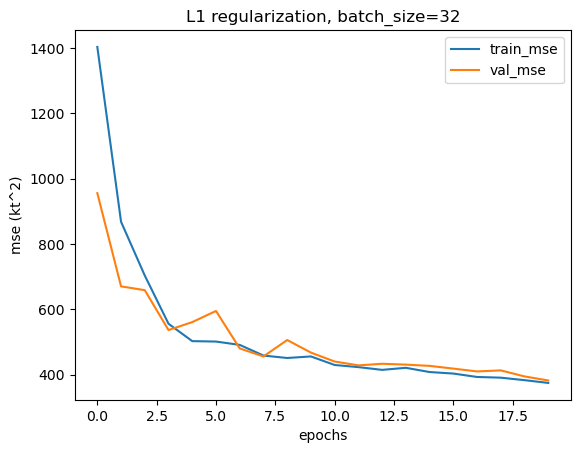

In [49]:
plot_xy(history,"L1 regularization, batch_size=32")